# Part 1: Regression analysis of Gapminder data
In this part of this project you will practice and experiment with linear regression using data from gapminder.org. We recommend spending a little time looking at material there, it is quite an informative site.

We will use a subset of data provided by gapminder provided by Jennifer Bryan described in it’s github page

Get the data from: https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv

In [1]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


For this exercise you will explore how life expectancy has changed over 50 years across the world, and how economic measures like gross domestic product (GDP) are related to it.

**Exercise 1**: Make a scatter plot of life expectancy across time.

Text(0.5, 1.0, 'Scatter plot of Life Expectancy vs. Year')

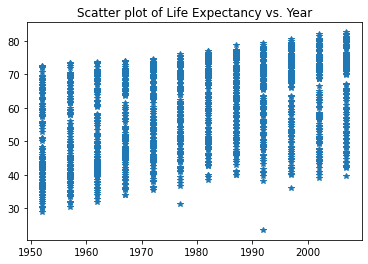

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(data['year'], data['lifeExp'], '*')
plt.title("Scatter plot of Life Expectancy vs. Year")

**Question 1**: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)

*The general trend is increasing. It is briefly linear, but it can be spotted that there is a slight curve. In addition, there are some outliers in the graph.*

**Question 2**: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

*The distribution is skewed: From skewed towards the bottom to skewed toward the top*

*Not unimodel*

*They are not symmetric around it's center and the skewing level changes through time*

In [3]:
# a helper for a per b
"""
    data: The dataframe
    a_col: The column name of a
    b_col: The column name of b
    prev_b: The first element of b
"""
def a_per_b(data, a_col, b_col, prev_b):
    a_per_b = []
    prev_b = prev_b
    a = []
    for idx, row in data.iterrows():
        b = row[b_col]
        if b != prev_b:
            a_per_b.append(a)
            a = []
        a.append(row[a_col])
        prev_b = b
    a_per_b.pop(0)
    a_per_b.append(a)
    return a_per_b

Text(0.5, 1.0, 'Violin Plot of Life Expectancy vs. Year')

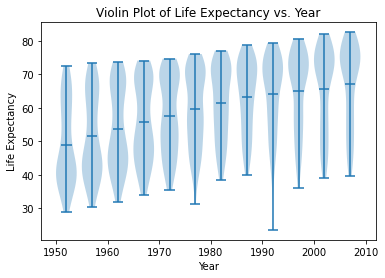

In [4]:
data.sort_values(by=['year'], inplace=True)  
life_exp_per_year = a_per_b(data, 'lifeExp', 'year', 1951)
years = list(range(1952, 2008, 5))

plt.violinplot(life_exp_per_year, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot of Life Expectancy vs. Year")

**Question 3**: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)

*Yes, I will reject. There does seem to be a relationship: life expectancy increases as the year increases.*

**Question 4**: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)

*It should look like a parabola that concave up, and part of graph should be below x=0 and another part above x=0*

**Question 5**: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

*(I have a little trouble understanding this question, so my answer would be about the violin plot that is done by the predicted life expectancies of linear regression model vs. year.) The violins should be more symmetric to the center as mean. The mean of the years should fit a line better than the raw data. I think not everything is okay, because the distribution of life expectancy skewed a lot, and changes over time. There might be some other important factors except time.*

**Exercise 2**: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = [[x] for x in data['year'].values]
Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(X, Y)
print("pred_lifeExp = {}*year + ({})".format(regfit.coef_[0][0], regfit.intercept_[0]))

pred_lifeExp = 0.3259038276371515*year + (-585.6521874415441)


**Question 6**: On average, by how much does life expectancy increase every year around the world?

*0.3259*

**Question 7**: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

*Yes, I do reject. Because the slope exist, and is not a number that is too close to 0, which means the relationship exists.*

**Exercise 3**: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

Text(0.5, 1.0, 'Violin plot of Residuals vs. Year')

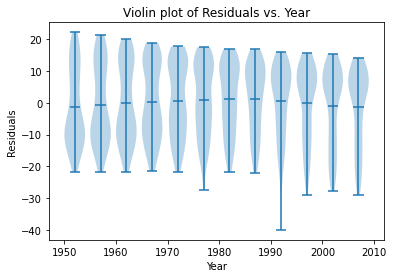

In [6]:
pred_lifeExp = []
for year in data['year'].values:
    pred_lifeExp.append(regfit.predict([[year]])[0][0])
data['pred_lifeExp'] = pd.Series(pred_lifeExp, index=data.index)
data['residual'] = data['lifeExp'] - data['pred_lifeExp']

residual = a_per_b(data, 'residual', 'year', 1951)
plt.violinplot(residual, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Violin plot of Residuals vs. Year")

**Question 8**: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

*Not really. It IS a parabola, but it actually concave down for the mean part.*

**Exercise 4**: Make a boxplot (or violin plot) of model residuals vs. continent.

Text(0.5, 1.0, 'Violin plot of Residuals vs. Continent')

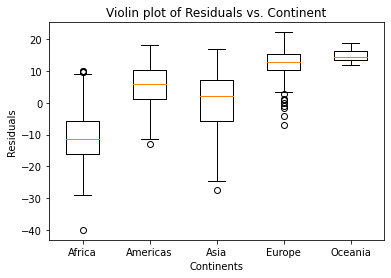

In [7]:
data.sort_values(by=['continent'], inplace=True)
residuals = a_per_b(data, 'residual', 'continent', 'Asia')
# print(residuals)
plt.boxplot(residuals, labels = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
plt.xlabel("Continents")
plt.ylabel("Residuals")
plt.title("Violin plot of Residuals vs. Continent")

**Question 9**: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

*Yes, there is a dependence. This implies that the continent is a component that can influence the life expectancy. Therefore, the continent should be seperated and be listed as a feature that can influence the result.*

**Exercise 5**: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line. The result here can be given as either one scatter plot per continent, each with its own regression line, or a single plot with each continent's points plotted in a different color, and one regression line per continent's points. The former is probably easier to code up.

Text(0.5, 1.0, 'life expectancy vs. year, grouped by continent')

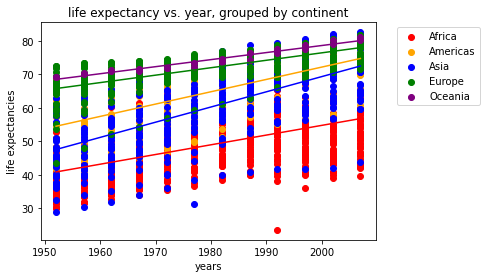

In [8]:
africa = data[data['continent'] == 'Africa']
americas = data[data['continent'] == 'Americas']
asia = data[data['continent'] == 'Asia']
europe = data[data['continent'] == 'Europe']
oceania = data[data['continent'] == 'Oceania']

africa_fit = reg.fit([[x] for x in africa['year'].values], [[y] for y in africa['lifeExp'].values])
africa_pred_lifeExp = []
for year in range(1952, 2008,5):
    africa_pred_lifeExp.append(africa_fit.predict([[year]])[0][0])
africa_inc = africa_fit.coef_

americas_fit = reg.fit([[x] for x in americas['year'].values], [[y] for y in americas['lifeExp'].values])
americas_pred_lifeExp = []
for year in range(1952, 2008,5):
    americas_pred_lifeExp.append(americas_fit.predict([[year]])[0][0])
americas_inc = americas_fit.coef_

asia_fit = reg.fit([[x] for x in asia['year'].values], [[y] for y in asia['lifeExp'].values])
asia_pred_lifeExp = []
for year in range(1952, 2008,5):
    asia_pred_lifeExp.append(asia_fit.predict([[year]])[0][0])
asia_inc = asia_fit.coef_

europe_fit = reg.fit([[x] for x in europe['year'].values], [[y] for y in europe['lifeExp'].values])
europe_pred_lifeExp = []
for year in range(1952, 2008,5):
    europe_pred_lifeExp.append(europe_fit.predict([[year]])[0][0])
europe_inc = europe_fit.coef_

oceania_fit = reg.fit([[x] for x in oceania['year'].values], [[y] for y in oceania['lifeExp'].values])
oceania_pred_lifeExp = []
for year in range(1952, 2008,5):
    oceania_pred_lifeExp.append(oceania_fit.predict([[year]])[0][0])
oceania_inc = oceania_fit.coef_

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(africa['year'], africa['lifeExp'], c='r', label='Africa')
ax1.plot(range(1952, 2008,5), africa_pred_lifeExp, c='r')
ax1.scatter(americas['year'], americas['lifeExp'], c='orange', label='Americas')
ax1.plot(range(1952, 2008,5), americas_pred_lifeExp, c='orange')
ax1.scatter(asia['year'], asia['lifeExp'], c='b', label='Asia')
ax1.plot(range(1952, 2008,5), asia_pred_lifeExp, c='b')
ax1.scatter(europe['year'], europe['lifeExp'], c='g', label='Europe')
ax1.plot(range(1952, 2008,5), europe_pred_lifeExp, c='g')
ax1.scatter(oceania['year'], oceania['lifeExp'], c='purple', label='Oceania')
ax1.plot(range(1952, 2008,5), oceania_pred_lifeExp, c='purple')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.xlabel('years')
plt.ylabel('life expectancies')
plt.title('life expectancy vs. year, grouped by continent')

**Question 10**: Based on this plot, should your regression model include an interaction term for continent and year? Why?

*Yes, because the regression lines have a large difference between each other based on the continent.*

**Exercise 6**: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). Hint: adding interaction terms is a form of feature engineering, like we discussed in class (think about, e.g., using (a subset of) polynomial features here).

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
continents = data['continent'].values
temp = []
for continent in continents:
    if continent == 'Africa': 
        temp.append(1)
    elif continent == 'Americas':
        temp.append(2)
    elif continent == 'Asia':
        temp.append(3)
    elif continent == 'Europe':
        temp.append(4)
    else:
        temp.append(5)
data['continent_index'] = pd.Series(temp, index = data.index)
regression = ols(formula='lifeExp ~ year + continent_index + year * continent', data=data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:21:56   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -521.4943     47.441    -10.993      0.000    -614.543    -428.446
continent[T.Americas]       -136.0849     56.099     -2.426      0.015    -246.115     -26.055
continent[T.Asia]           -307.1060     57.962     -5.298      0.000    -420.791    -193.421
continent[T.Europe]          165.1374     71.080      2.323      0.020      25.723     304.552
continent[T.Oceania]         193.4039     86.527      2.235      0.026      23.692     363.116
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
continent_index               -2.7635     23.512     -0.118      0.906     -48.880      43.353
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Question 11**: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

*Yes, coef, std err, and t are all very different from zero*

**Question 12**: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

In [10]:
# refer to the code above
print("Africa: {}".format(africa_inc[0][0]))
print("Americas: {}".format(americas_inc[0][0]))
print("Asia: {}".format(asia_inc[0][0]))
print("Europe: {}".format(europe_inc[0][0]))
print("Oceania: {}".format(oceania_inc[0][0]))

Africa: 0.28952926304464766
Americas: 0.36765093706293706
Asia: 0.453122403899131
Europe: 0.22193214452214463
Oceania: 0.2102723776223776


**Exercise 7**: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

Text(0.5, 1.0, 'Violin plot of residuals vs. year')

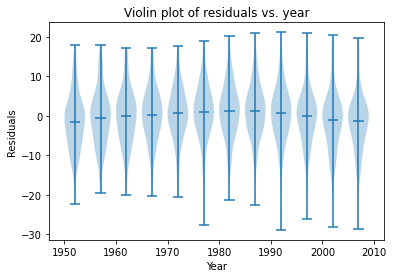

In [11]:
pred_lifeExp2 = []
pred_lifeExp2 = regression.predict()
data['pred_lifeExp2'] = pd.Series(pred_lifeExp2, index=data.index)
data['residual2'] = data['lifeExp'] - data['pred_lifeExp2']

data.sort_values(by=['year'], inplace=True)
residual = a_per_b(data, 'residual2', 'year', 1951)

plt.violinplot(residual, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Violin plot of residuals vs. year")

# Part 2: Classification

## Gradient Descent
**Problem 1** Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm we discussed in class to multiple parameters.

In [12]:
import math as m
def compute_loss(x, y, weights):
    return y - (m.exp(np.dot(weights, x)))/(1+m.exp(np.dot(weights, x)))

def grad_descent(X, Y, alpha, K, N):
    # weights and loss
    weights = np.zeroes(D)
    loss = np.zeroes(K)

    for k in range(K):
        # prediction for kth iteration
        Yhat = X.dot(weights)
        
        # compute loss and gradient
        for i in range(N):
            loss[k] += compute_loss(Y[i], Yhat)
            gradient += compute_gradient(X[i], Y[i], theta)

        # update weights
        weights = weights - alpha * gradient

    return weights, loss

**Problem 2** Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

In [13]:
def grad_descent(X, Y, alpha, K, N):
    # weights and loss
    weights = np.zeros(len(X[0]))
    loss = np.zeros(N)
    gradient = 0
    
    for k in range(K):
        # compute loss and gradient
        for i in range(N):
            loss[i] = compute_loss(X[i], Y[i], weights)
            gradient = loss[i] * X[i]

        # update weights
        weights = weights + alpha * gradient
        weights = weights/np.linalg.norm(weights)

    return weights, loss

**Problem 3** To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

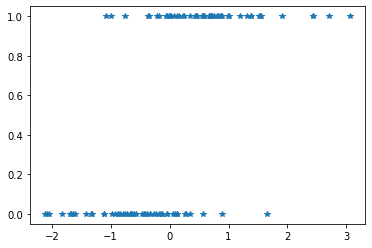

In [14]:
from sklearn import datasets
# Generate data for linear regression:
gen_data_x, gen_data_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

(theta, loss) = grad_descent(log_gen_data_x, log_gen_data_y, 5, 5, len(log_gen_data_y))
estimated = np.zeros(len(log_gen_data_y))
for i in range(len(log_gen_data_x[0])):
    estimated += log_gen_data_x[:, i] * theta[i]
estimated += loss
plt.plot(estimated, log_gen_data_y, '*')

## Try it out!


scores_tree: [0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1]
percentage_tree: 0.45
scores_LDA: [1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1]
percentage_LDA: 0.47
tree vs. GD: Ttest_relResult(statistic=3.830848598065225, pvalue=0.00022422440327589299)
LDA vs. GD: Ttest_relResult(statistic=4.508882928005746, pvalue=1.791667602581902e-05)


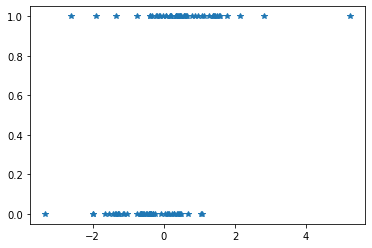

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import discriminant_analysis
from scipy import stats

# simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
X, dump_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
Y = [0 if i>20 else 1 for i in dump_y]

# classification trees, cv for 10-fold cross-validation
model = tree.DecisionTreeClassifier()
scores_tree = cross_val_predict(model, X, Y, cv=10)
print("scores_tree: {}".format(scores_tree))
print("percentage_tree: {}".format(sum(scores_tree)/100))

# LDA
model = discriminant_analysis.LinearDiscriminantAnalysis()
scores_LDA = cross_val_predict(model, X, Y, cv=10)
print("scores_LDA: {}".format(scores_LDA))
print("percentage_LDA: {}".format(sum(scores_LDA)/100))

# gradient descent
(theta,loss) = grad_descent(X, Y, 20, 20, len(Y))
estimated = np.zeros(len(Y))
for i in range(len(X[0])):
    estimated += X[:, i] * theta[i]
estimated += loss
plt.plot(estimated, Y, '*')

# t-test for tree vs. GD
print("tree vs. GD: {}".format(stats.ttest_rel(scores_tree,estimated)))

# t-test for LDA vs. GD
print("LDA vs. GD: {}".format(stats.ttest_rel(scores_LDA,estimated)))